In [6]:
from matplotlib import pylab as plt
from client.models.AMLmodel import classes as aml_classes
import stackn.auth as sa
import requests
import numpy as np


class_names_y = [aml_classes[k] for k in aml_classes] + ['Total']
# If you are running locally with self signed certificate, then CHANGE the secure and verify variables to False
secure = {"STACKN_SECURE": True}
conf, status = sa.get_token(secure)

# Load image to predict on / form input
imgtest = np.load('dataset/processed/data_partitions/partition0/data_singlets/MON_1683.npy')
imgtest=np.expand_dims(imgtest,0)
inp = {"inputs": imgtest.tolist()}

# You can get this endpoint by serving the model through the Tensorflow Serve App on Scilifelab Serve
endpoint = 'https://r3f5807dc.serve-dev.scilifelab.se/v1/models/models:predict'
res = requests.post(endpoint, json=inp, headers={"Authorization": "Bearer "+conf['STACKN_ACCESS_TOKEN']})

Prediction: Lymphocyte (atypical)


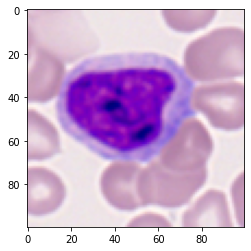

In [7]:
plt.imshow(imgtest[0])
print("Prediction:", class_names_y[np.argmax(res.json()['outputs'])])